## PURPOSE
This notebook is used for preliminary/exploratory analysis of the data obtained from Unity - that being the "Hand data" that we have obtained for a few different experiments.

In [1]:
# Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [30]:
# set the current working directory to the right location
from IPython.core.getipython import get_ipython

# Get the notebook's full path
notebook_path = os.path.abspath(get_ipython().starting_dir)

# Get the directory containing the script
os.chdir(notebook_path + '/2023-08-15/Wrist ROM - Smooth')

# Load in the csv files from my local machine
p_smooth_ROM = pd.read_csv('20230815_185324_pinky.csv').iloc[0:5000,:]
r_smooth_ROM = pd.read_csv('20230815_185324_ring.csv').iloc[0:5000,:]
m_smooth_ROM = pd.read_csv('20230815_185324_middle.csv').iloc[0:5000,:]
i_smooth_ROM = pd.read_csv('20230815_185323_index.csv').iloc[0:5000,:]
t_smooth_ROM = pd.read_csv('20230815_185323_thumb.csv').iloc[0:5000,:]

Text(0.5, 1.0, 'Index Finger Metacarpal base, proximal base')

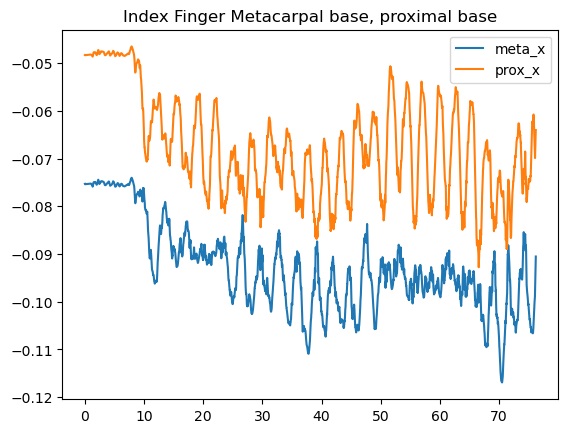

In [32]:
# Plot out the data from p_smooth_ROM
plt.plot(i_smooth_ROM.iloc[:,0], i_smooth_ROM.iloc[:,1], label = "meta_x")
plt.plot(i_smooth_ROM.iloc[:,0], i_smooth_ROM.iloc[:,4], label = "prox_x")
plt.legend()
plt.title("Index Finger Metacarpal base, proximal base")

Text(0.5, 1.0, 'Index Finger Metacarpal base, proximal base')

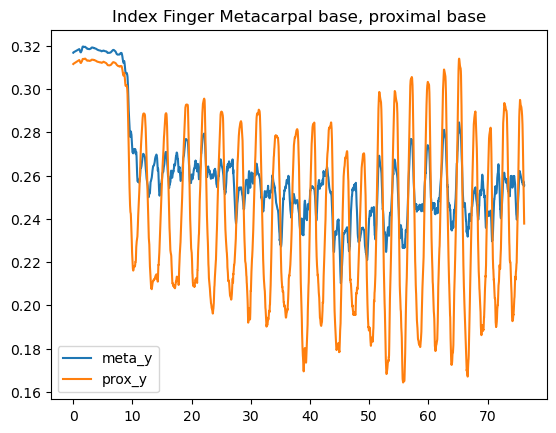

In [33]:
plt.plot(i_smooth_ROM.iloc[:,0], i_smooth_ROM.iloc[:,2], label = "meta_y")
plt.plot(i_smooth_ROM.iloc[:,0], i_smooth_ROM.iloc[:,5], label = "prox_y")
plt.legend()
plt.title("Index Finger Metacarpal base, proximal base")

Text(0.5, 1.0, 'Index Finger Metacarpal base, proximal base')

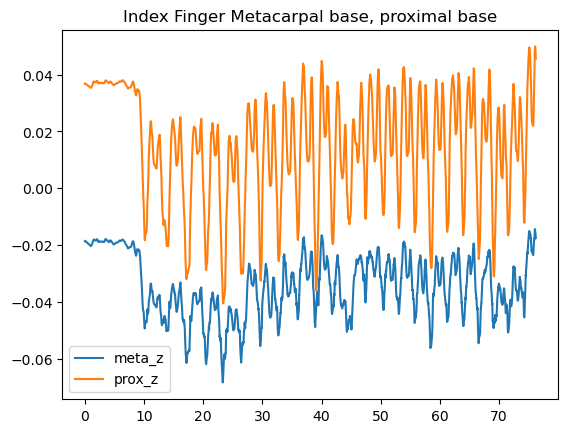

In [34]:
plt.plot(i_smooth_ROM.iloc[:,0], i_smooth_ROM.iloc[:,3], label = "meta_z")
plt.plot(i_smooth_ROM.iloc[:,0], i_smooth_ROM.iloc[:,6], label = "prox_z")
plt.legend()
plt.title("Index Finger Metacarpal base, proximal base")

In [37]:
# Create an np.array which is the vector (t,x,y,z) for the metacarpal pinky bone
# Only got the first 4500 data points
vector_array = np.transpose(np.array([np.asarray(i_smooth_ROM.iloc[:,0]),
                         np.asarray(i_smooth_ROM.iloc[:,1] - i_smooth_ROM.iloc[:,4]),
                         np.asarray(i_smooth_ROM.iloc[:,2] - i_smooth_ROM.iloc[:,5]),
                         np.asarray(i_smooth_ROM.iloc[:,3] - i_smooth_ROM.iloc[:,6])]))

# I want to normalise these vectors - to do this I should divide each element by 1/sqrt of that rows vector size
vector_sizes = np.sqrt(np.sum(np.square(vector_array[:,1:3]), axis=1))

# Normalise the vectors by dividing through by the vector size
vector_array[:,1:3] = np.divide(vector_array[:,1:3],vector_sizes[:,None])

Text(0.5, 1.0, 'Index Finger Metacarpal Bone Vector components over time')

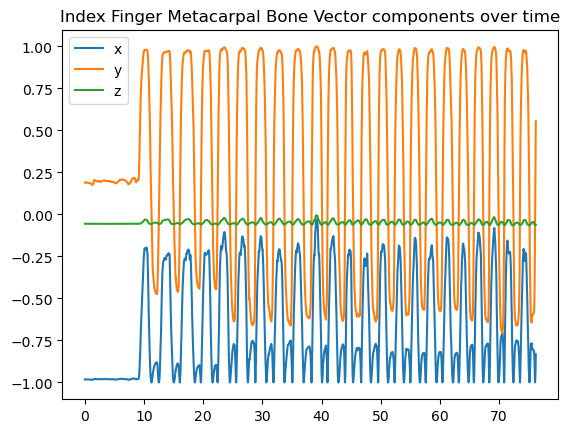

In [38]:
# Plot the vectors x, y, z over time.
plt.plot(vector_array[:,0], vector_array[:,1], label = "x")
plt.plot(vector_array[:,0], vector_array[:,2], label = "y")	
plt.plot(vector_array[:,0], vector_array[:,3], label = "z")
plt.legend()
plt.title("Index Finger Metacarpal Bone Vector components over time")

There is quite obviously a pattern in the above for smooth wrist movements - now, let's go ahead and create a vector for the starting, stationary motion, and measure angles from there.

## Creating the original, stationary vector
In order to accurately evaluate ROM - we will need an *original, stationary vector direction*. This can be achieved by using the **median** for the first part of the dataset for all x,y,z components, and using these as the original vector.

From my understanding of vectors through robotics, the best way to find the angle of rotation is setting an origin axis, and measuring the rotation about this axis.

Since we are measuring wrist ROM, and specificially wrist extension/flexion, we will need to set the origin vector to be the along the metacarpal base bones - likely just from index to middle finger.

In [46]:
i_smooth_ROM.loc[:,"time":"meta_z"][i_smooth_ROM['time'] < 5]

,time,meta_x,meta_y,meta_z
0,0.020000,-0.075306,0.316786,-0.018605
1,0.040000,-0.075386,0.316912,-0.018475
2,1.040000,-0.075255,0.318450,-0.020370
3,1.242136,-0.075593,0.316981,-0.019665
4,1.309274,-0.075878,0.316945,-0.019139
...,...,...,...,...
162,4.877274,-0.074871,0.317506,-0.019715
163,4.902378,-0.074939,0.317526,-0.019737
164,4.927950,-0.075035,0.317561,-0.019749
165,4.958273,-0.075115,0.317578,-0.019739


In [41]:
# Get the vector for the base of the index metacarpal to the base of the middle metacarpal - let's see how consistent these are by doing it for every metacarpal base (aside from thumb)
def generate_origin_axis(index_finger = i_smooth_ROM, other_finger = m_smooth_ROM, plot = False):
    """Generate the origin axis for the index finger based on the base of the index metacarpal to the base of another bone."""
    # Expected inputs are pandas dbs with the following columns: 't', 'x', 'y', 'z'
    # Get the base of the index metacarpal as a vector.
    # Can assume the first 5s of data are fine
    index_base = index_finger.loc[:,"time":"meta_z"][i_smooth_ROM['time'] < 5]
    index_base = index_finger.loc[:,"time":"meta_z"][i_smooth_ROM['time'] < 5]
     
    